# <font color='darkred'><center> Jupyter Notebook </center></font>

The IPython Notebook, known as Jupyter Notebook, is an interactive computational environment, in which we can combine code execution, text, mathematics, plots and media. We used it, not only because it was recommended for the project, but also because it is very useful to provide a full data analysis that could be easily read. In fact we could interleave documentation (such as explanations or comments) and code.    

#  <font color='darkblue'><center> Exploring Covid-19 through Italy regions and provinces datasets </center></font>
# <font color='darkred'> Authors: </font> 

## Martina Pacifici
Born on 07/09/1995 in Castiglion Fiorentino (AR). She learnt English, German and Spanish in High School. She got an Economics Bachelor's degree at the Univeristy of Florence in April 2018. Now she is attending there the second year of the Statistics master degree.

## Federica Sauro Graziano
Born on 16/01/1994 in Florence (FI). She attended scientific High School "Castelnuovo" in Florence. She got the Statistics Bachelor's degree at the Univeristy of Florence in July 2017. Now she is finishing there the last year of master degree in Statistic. 

# <font color='darkred'>Quick summary:</font>

First we import the two dataset: r will be regions dataset, while p provinces dataset of Italy.

This two are taken from Civil protection's account on github website:
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json

The collaborators and mantainers, who daily update the datasets at 06:30 p.m., are Umberto Rosini and Pierluigi Cara. They started to load data from 7th of March 2020 and they will stop on the 31th of July 2020.

We downloaded the data on the morning of the 1st of July, so in our dataset we have data from the 24th of Febraury 2020 to the 30th of June.

Each dataset is an everyday collection of data regarding Covid-19 at Italy regions and provinces level, so that we have a hierarchical structure: regions are the macro-level and each region has more provinces, while provinces are the micro-level and each province belongs to just one region.

Now we'll provide some descriptions of the two datasets:
## Regions:
The shape of the dataset is 2688 rows x 21 columns.

Each row is a region at a particular day (date is recored as 'data') and for each region we have several information.

- **Attributes referred to geographic issues**: 
    
    - 'stato': ITA for each row (we have only Italy regions)
    - 'codice_regione': numerical unique code for each region
    - 'denominazione_regione': name of the region
    - 'lat': latitude in decimal degree
    - 'long': longitude in decimal degree
   
    We observed that latitude and longitude refers to the ones of the regional capital (i.e. latitude and longitude of Tuscany are the same of Florence in the provinces dataset). 
   
- **Attributes reffered to covid-19 development**: 
    
    - 'ricoverati_con_sintomi': cases hospedalized with symptoms of covid-19
    - 'terapia_intensiva': cases hospedalized in the intensive care unit 
    - 'totale_ospedalizzati': total cases hospedalized
    - 'isolamento_domiciliare': home isolation cases
    - 'totale_positivi': total positive cases ('ricoverati_con_sintomi' + 'terapia_intensiva' + 'isolamento_domiciliare')
    - 'variazione_totale_positivi': change in positive cases
    - 'nuovi_positivi': new positive cases
    - 'dimessi_guariti': discharged healed cases from the hospital
    - 'deceduti': death cases
    - 'casi_da_sospetto_diagnostico': positive cases (to the swab) from the ones reported from clinical activity
    - 'casi_da_screening': positive cases (to the swab) from the screening test
    - 'totale_casi': total cases ('totale_positivi' + 'dimessi_guariti' + 'deceduti')
    - 'tamponi': number of swabs
    - 'casi_testati': tested cases
    - 'note': some notes specific for very few region (only 6 are different from **None**)
    
## Provinces:
The shape of the dataset is 16510 rows x 11 columns.

Each row is a province at a particular day (date is recored as 'data') and for each province we have several information.
   
- **Attributes referred to geographic issues**: 
    
    - 'stato': ITA for each row (we have only Italy provinces)
    - 'codice_regione': numerical unique code for each region the province belongs to
    - 'denominazione_regione': name of the region the province belongs to
    - 'codice_provincia': numerical unique code for each province
    - 'denominazione_provincia': name of the province
    - 'sigla_provincia': provincial acronym
    - 'lat': latitude in decimal degree referred to the province
    - 'long': longitude in decimal degree referred to the province
    

- **Attributes reffered to covid-19 development**: 
    - 'totale_casi': total cases (computed in the same way as regions, even if we don't have the other attributes in this dataset)
    - 'note': some notes specific for very few provinces (only 6 are different from **None**)

In [47]:
import json
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-regioni.json") as f1:
   
        r = json.load(f1)

In [48]:
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-province2.json") as f2:

        p = json.load(f2)

## Libraries:
- numpy: provides an efficient interface to store and manipulate numerical arrays, in particular when arrays grow larger size
- pandas: is useful for manipulation of data and it creates Pandas objects, that are structures in which the rows and columns are identified with labels. In our analysis we used most its object DataFrame
- matplotlib.pyplot: is a multi-platform data visualization and we used it to create several plots
- geopandas: is a library to deal with geospatial data. To use geopandas we needed also gdal and shapely to open shapefiles, fiona for file access, descartes and matplotlib to visualize data
- datetime, dateutil and parser: this are useful libraries to deal with dates


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import shapely
import gdal
import descartes
from datetime import datetime
from dateutil import parser

## Data manipulation

We now traform our datasets in objects DataFrame throught **pandas**

In [90]:
regioni = pd.DataFrame(r)
province = pd.DataFrame(p)

Here we verify if there are some null values that we don't want.

Regarding the "regioni" DataFrame there are no null values. 

In [91]:
regioni.isnull()
sum(regioni.codice_regione.isnull())
sum(regioni.lat.isnull())
sum(regioni.long.isnull())

0

Regarding the "province" DataFrame there are some provinces that are "In fase di definizione/aggiornamento" that have **NaN** values in 'sigla_provincia', 'lat' and 'long', so we simply drop these.

With the command *dropna* we drop all the row with **NaN** values by selecting just one column of our choice.

In [92]:
province = province.dropna(subset=['sigla_provincia'])

Here we just reset the index to have an ordered one.

In [93]:
province = province.reset_index()
province = province.drop("index", axis = 1)

## Date format

Now we focus on extrapolating the date to have some adding information of the timing of the analysis.

First we just have the string date and we think to convert it in a date format, and finally in each dataset we add two new columns, one to record the month the date refers to, and the other to record the week of the year.

In [94]:
date_new_r = []
month_r = []
week_r = []

date_new_p = []
month_p = []
week_p = []

new_format = "%Y-%m-%d-%U"
month_format = "%m"
week_format = "%U"

for s in regioni.data:
    date_new_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))
    month_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(month_format))
    week_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(week_format))


for s in province.data:
    date_new_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))
    month_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(month_format))
    week_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(week_format))

regioni['new_date']=date_new_r
regioni['month']=month_r
regioni['week']=week_r

province['new_date']=date_new_p
province['month']=month_p
province['week']=week_p

## Grouping 

Here we do some aggregations and pivot tables for a better data visualization.

The first method we used is *groupby*. We built a new DataFrame named "mese_prov" grouping "province" for 'month' and 'denominazione_provincia'. Then we selected 'totale_casi' to show only this applying the median function. We used the median, instead of the mean, because it is not sensitive to outliers, that in our case could be days with a strong increase of positive cases. In this case each row represents the 50th percentile of total cases of a province in a specific month.

For a significative visualization we only selected rows with more than 5000 total cases.

We noticed that the provinces that satisfy this query are mostly in the north of Italy and the months start from April.

In [134]:
mese_prov = province.groupby(['month','denominazione_provincia'])[['totale_casi']].median()
mese_prov[mese_prov.totale_casi>5000]

totale_casi
month denominazione_provincia             
04    Bergamo                      10495.0
      Brescia                      11271.0
      Cremona                       5237.5
      Milano                       14813.5
      Torino                        8886.0
05    Bergamo                      12397.0
      Brescia                      14091.0
      Cremona                       6313.0
      Genova                        5260.0
      Milano                       22041.0
      Monza e della Brianza         5265.0
      Roma                          5397.0
      Torino                       14980.0
      Verona                        5002.0
06    Bergamo                      13903.0
      Bologna                       5108.0
      Brescia                      15331.5
      Cremona                       6557.5
      Genova                        5790.0
      Milano                       23884.0
      Monza e della Brianza         5659.5
      Pavia                         5491.0
      Roma                          5830.0
      Torino                       15797.5
      Verona                        5111.0

The second method we used is through *pivot_table*. 

This is a way to see DataFrame objects stored in MultiIndex objects (hierarchical indexes). Comparing it ot *groupby* the data visualization seems to be better because we have a two dimensional grid instead of a one-dimentional index.

In the next table we used the "regioni" DataFrame and in the framework of pivot tables we created "table01" selecting 'month' for columns and 'denominazione_regione' for rows (index) and choosing the median for 'totale_casi'.

As before we selected more than 5000 total cases.

Some regions reach 5000 cases in some months but not in others, where they are filled with NaN. We replaced these missing values with *np.nan* so, if we want, we could do some computations.

In [135]:
table01 = pd.pivot_table(regioni[regioni.totale_casi>5000], values=['totale_casi'], index = ['denominazione_regione'], 
                        columns = 'month' , aggfunc='median', fill_value = np.nan)
table01

totale_casi                         
month                          03       04     05       06
denominazione_regione                                     
Emilia-Romagna            10054.0  21257.5  27182  28090.5
Lazio                         NaN   5975.0   7396   7962.5
Liguria                       NaN   6598.5   9111   9889.0
Lombardia                 22264.0  62623.5  84518  91988.5
Marche                        NaN   5826.0   6642   6762.5
Piemonte                   7381.5  18668.5  29483  31075.5
Toscana                       NaN   7943.0   9913  10189.5
Veneto                     7216.0  14807.0  18928  19220.5

The next table shows the same things as before, but for the provinces using "province" DataFrame. 

We noticed that there are no data for Tuscany and Marche. This is because there are no province for that regions which reach more than 5000 cases. In the previous table we saw these regions because the sum of the cases of their provinces in median is more than 5000.

Again we filled missing values with *np.nan*.

In [136]:
table02 = province[province.totale_casi>5000].pivot_table('totale_casi', 
                                                         index = ['denominazione_regione', 'denominazione_provincia'], 
                                                         columns = 'month' , aggfunc=['median'], fill_value = np.nan)
round(table02,2)

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Emilia-Romagna        Bologna                     NaN      NaN   5016   5108.0
Lazio                 Roma                        NaN      NaN   5466   5830.0
Liguria               Genova                      NaN      NaN   5351   5790.0
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0
                      Brescia                  6931.0  11271.0  14091  15331.5
                      Cremona                     NaN   5706.0   6313   6557.5
                      Milano                   7195.5  14813.5  22041  23884.0
                      Monza e della Brianza       NaN      NaN   5363   5659.5
                      Pavia                       NaN      NaN   5204   5491.0
Piemonte              Torino                      NaN   9309.5  14980  15797.5
Veneto                Verona                      NaN      NaN   5072   5111.0

Through the method "query" we can select a specific index from a pivot table.

We selected Lombardy because it is the most hit region.

In [137]:
table02.query('denominazione_regione==["Lombardia"]')

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0
                      Brescia                  6931.0  11271.0  14091  15331.5
                      Cremona                     NaN   5706.0   6313   6557.5
                      Milano                   7195.5  14813.5  22041  23884.0
                      Monza e della Brianza       NaN      NaN   5363   5659.5
                      Pavia                       NaN      NaN   5204   5491.0

In [138]:
# selezione tramite indicizzazione
round(table02.iloc[2:4],2) # notazione implicita (come slice di base: es. arriva fino al quarto elemento 
                            #per riga e secondo elemento per colonna)

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Liguria               Genova                      NaN      NaN   5351   5790.0
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0

In [139]:
round(table02.loc['Liguria':'Veneto'],2) #notazione esplicita, considera gli indici che ha ciascuna series

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Liguria               Genova                      NaN      NaN   5351   5790.0
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0
                      Brescia                  6931.0  11271.0  14091  15331.5
                      Cremona                     NaN   5706.0   6313   6557.5
                      Milano                   7195.5  14813.5  22041  23884.0
                      Monza e della Brianza       NaN      NaN   5363   5659.5
                      Pavia                       NaN      NaN   5204   5491.0
Piemonte              Torino                      NaN   9309.5  14980  15797.5
Veneto                Verona                      NaN      NaN   5072   5111.0

In [140]:
table3 = province[(province.totale_casi>5000) & (province.week<'26')].pivot_table('totale_casi', index = ['week'], 
                                                         columns = 'denominazione_regione' , aggfunc=['sum'], fill_value = 0.0)
table3

sum                                         
denominazione_regione Emilia-Romagna  Lazio Liguria Lombardia Piemonte Veneto
week                                                                         
11                                 0      0       0     16051        0      0
12                                 0      0       0    140756        0      0
13                                 0      0       0    189901    11067      0
14                                 0      0       0    224277    46891      0
15                                 0      0       0    281229    61473      0
16                                 0      0       0    319753    76848      0
17                                 0      0       0    344288    89938      0
18                                 0  25568   15109    371966    98796      0
19                                 0  37112   36012    414171   103087   5002
20                                 0  38462   37702    457481   106476  35295
21                             10022  39205   39235    473824   108443  35588
22                             35251  39671   40110    482252   109555  35708
23                             35450  40389   40593    489375   110138  35749
24                             35855  41063   40826    497455   110703  35800
25                             36205  41034   39760    503138   111053  35858

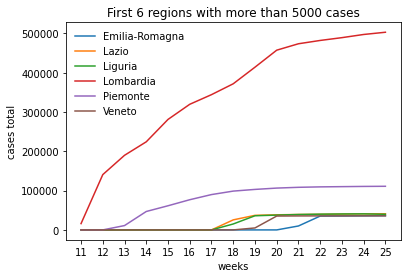

In [141]:
ax = plt.axes()
ax.plot(table3)
ax.set(xlabel='weeks', ylabel='cases total', title='First 6 regions with more than 5000 cases');
ax.legend(['Emilia-Romagna','Lazio',  'Liguria',
            'Lombardia','Piemonte','Veneto'], loc='upper left', frameon=False)

In [142]:
#table3.columns
regioni.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note', 'new_date', 'month',
       'week'],
      dtype='object')

In [196]:
#Regioni

tableR1 = regioni.pivot_table('totale_casi', index = ['denominazione_regione'], 
                                                         columns = 'month' , aggfunc=['mean'], fill_value = 0.0)
round(tableR1,2)

mean                                        
month                      02        03        04        05        06
denominazione_regione                                                
Abruzzo                  0.67    403.68   2295.90   3143.13   3273.13
Basilicata               0.00     57.13    322.17    391.45    400.47
Calabria                 0.33    187.26    950.83   1141.97   1166.17
Campania                 3.33    637.10   3691.33   4652.16   4703.43
Emilia-Romagna          91.67   5184.55  20901.77  27032.90  28114.80
Friuli Venezia Giulia    0.00    560.52   2520.23   3174.06   3294.57
Lazio                    3.50    935.29   5167.40   7331.77   7938.23
Liguria                 15.33   1103.97   5946.87   9052.58   9877.23
Lombardia              369.83  17849.39  61810.10  83729.13  91775.00
Marche                   3.50   1515.29   5380.53   6584.77   6760.53
Molise                   0.00     45.65    254.53    386.35    440.10
P.A. Bolzano             0.83    427.00   2129.50   2573.65   2615.43
P.A. Trento              0.00    573.16   3162.33   4332.87   4541.60
Piemonte                 5.50   2903.19  18530.03  29205.26  31063.33
Puglia                   1.17    530.61   3173.33   4348.16   4517.67
Sardegna                 0.00    217.61   1112.60   1342.94   1362.80
Sicilia                  3.00    469.52   2532.23   3360.35   3301.87
Toscana                  4.17   1487.71   7570.33   9871.55  10181.50
Umbria                   0.00    343.84   1308.50   1418.00   1436.03
Valle d'Aosta            0.00    198.55    957.50   1165.23   1191.27
Veneto                 100.00   3392.29  14566.10  18822.52  19219.23

In [197]:
tableR2 = regioni[regioni.totale_casi>5000].pivot_table(['ricoverati_con_sintomi', 'terapia_intensiva','totale_ospedalizzati','totale_positivi',
       'dimessi_guariti','deceduti','totale_casi'],index = ['denominazione_regione'], 
                         columns = ['month'], 
                         aggfunc=['mean'], fill_value = 0.0)
stacked = tableR2.stack(1)
round(stacked,2)

mean                      \
month                                               03        04        05   
denominazione_regione                                                        
Emilia-Romagna        deceduti                 1082.00   2743.20   3917.42   
                      dimessi_guariti           728.31   5326.17  17009.39   
                      ricoverati_con_sintomi   3038.62   3290.23   1061.68   
                      terapia_intensiva         298.77    309.00    123.19   
                      totale_casi              9907.38  20901.77  27032.90   
                      totale_ospedalizzati     3337.38   3599.23   1184.87   
                      totale_positivi          8097.08  12832.40   6106.10   
Lazio                 deceduti                    0.00    367.06    613.13   
                      dimessi_guariti             0.00   1197.35   2792.77   
                      ricoverati_con_sintomi      0.00   1394.18   1160.39   
                      terapia_intensiva           0.00    172.94     76.42   
                      totale_casi                 0.00   5946.71   7331.77   
                      totale_ospedalizzati        0.00   1567.12   1236.81   
                      totale_positivi             0.00   4382.29   3925.87   
Liguria               deceduti                    0.00    938.18   1339.19   
                      dimessi_guariti             0.00   2166.05   5333.35   
                      ricoverati_con_sintomi      0.00    882.50    389.45   
                      terapia_intensiva           0.00    106.09     33.97   
                      totale_casi                 0.00   6551.59   9052.58   
                      totale_ospedalizzati        0.00    988.59    423.42   
                      totale_positivi             0.00   3447.36   2380.03   
Lombardia             deceduti                 3066.74  11239.23  15290.10   
                      dimessi_guariti          4826.83  18727.60  39676.00   
                      ricoverati_con_sintomi   7807.17  10483.27   4804.23   
                      terapia_intensiva         982.87   1024.67    309.13   
                      totale_casi             23273.09  61810.10  83729.13   
                      totale_ospedalizzati     8790.04  11507.93   5113.35   
                      totale_positivi         15379.52  31843.27  28763.03   
Marche                deceduti                    0.00    807.95    970.13   
                      dimessi_guariti             0.00   1747.81   3159.74   
                      ricoverati_con_sintomi      0.00    783.24    204.00   
                      terapia_intensiva           0.00     83.19     23.65   
                      totale_casi                 0.00   5770.62   6584.77   
                      totale_ospedalizzati        0.00    866.43    227.65   
                      totale_positivi             0.00   3214.86   2454.90   
Piemonte              deceduti                  593.12   2012.50   3541.52   
                      dimessi_guariti           184.62   3528.70  14811.74   
                      ricoverati_con_sintomi   2833.88   3217.17   1697.42   
                      terapia_intensiva         420.75    339.63    110.94   
                      totale_casi              7381.88  18530.03  29205.26   
                      totale_ospedalizzati     3254.62   3556.80   1808.35   
                      totale_positivi          6604.12  12988.83  10852.00   
Toscana               deceduti                    0.00    569.48    967.23   
                      dimessi_guariti             0.00   1159.90   5776.06   
                      ricoverati_con_sintomi      0.00    902.55    274.94   
                      terapia_intensiva           0.00    212.10     65.42   
                      totale_casi                 0.00   7663.55   9871.55   
                      totale_ospedalizzati        0.00   1114.66    340.35   
                      totale_positivi             0.00   5934.17   3128.

In [198]:
new_dataset = pd.merge(regioni, province, on='codice_regione')
new_dataset

,data_x,stato_x,codice_regione,denominazione_regione_x,lat_x,long_x,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,codice_provincia,denominazione_provincia,sigla_provincia,lat_y,long_y,totale_casi_y,note_y,new_date_y,month_y,week_y
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-24-08,02,08
1,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,67,Teramo,TE,42.658918,13.704400,0,None,2020-02-24-08,02,08
2,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,68,Pescara,PE,42.464584,14.213648,0,None,2020-02-24-08,02,08
3,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,69,Chieti,CH,42.351032,14.167546,0,None,2020-02-24-08,02,08
4,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-25-08,02,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751419,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,25,Belluno,BL,46.138375,12.217042,1191,None,2020-06-30-26,06,26
1751420,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,26,Treviso,TV,45.667546,12.245074,2673,None,2020-06-30-26,06,26
1751421,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,27,Venezia,VE,45.434905,12.338452,2682,None,2020-06-30-26,06,26
1751422,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,28,Padova,PD,45.406930,11.876087,3954,None,2020-06-30-26,06,26


In [199]:
new_dataset.pivot_table(['ricoverati_con_sintomi', 'terapia_intensiva'],index = ['denominazione_regione_x'], 
                         columns = ['month_y'], aggfunc=['mean'], fill_value = 0.0)

mean                            \
                        ricoverati_con_sintomi                             
month_y                                     02           03           04   
denominazione_regione_x                                                    
Abruzzo                             173.140625   173.140625   173.140625   
Basilicata                           22.476562    22.476562    22.476562   
Calabria                             64.093750    64.093750    64.093750   
Campania                            279.367188   279.367188   279.367188   
Emilia-Romagna                     1487.171875  1487.171875  1487.171875   
Friuli Venezia Giulia                87.085938    87.085938    87.085938   
Lazio                               764.843750   764.843750   764.843750   
Liguria                             441.960938   441.960938   441.960938   
Lombardia                          5527.625000  5527.625000  5527.625000   
Marche                              375.859375   375.859375   375.859375   
Molise                               11.210938    11.210938    11.210938   
P.A. Bolzano                         83.117188    83.117188    83.117188   
P.A. Trento                         117.867188   117.867188   117.867188   
Piemonte                           1599.804688  1599.804688  1599.804688   
Puglia                              263.304688   263.304688   263.304688   
Sardegna                             54.492188    54.492188    54.492188   
Sicilia                             212.929688   212.929688   212.929688   
Toscana                             396.226562   396.226562   396.226562   
Umbria                               52.875000    52.875000    52.875000   
Valle d'Aosta                        41.835938    41.835938    41.835938   
Veneto                              607.687500   607.687500   607.687500   

                                                                     \
                                                  terapia_intensiva   
month_y                           05           06                02   
denominazione_regione_x                                               
Abruzzo                   173.140625   173.140625         20.921875   
Basilicata                 22.476562    22.476562          4.453125   
Calabria                   64.093750    64.093750          5.289062   
Campania                  279.367188   279.367188         34.898438   
Emilia-Romagna           1487.171875  1487.171875        152.117188   
Friuli Venezia Giulia      87.085938    87.085938         13.726562   
Lazio                     764.843750   764.843750         82.578125   
Liguria                   441.960938   441.960938         57.148438   
Lombardia                5527.625000  5527.625000        527.828125   
Marche                    375.859375   375.859375         53.750000   
Molise                     11.210938    11.210938          2.437500   
P.A. Bolzano               83.117188    83.117188         15.335938   
P.A. Trento               117.867188   117.867188         20.890625   
Piemonte                 1599.804688  1599.804688        162.648438   
Puglia                    263.304688   263.304688         32.046875   
Sardegna                   54.492188    54.492188          9.390625   
Sicilia                   212.929688   212.929688         23.992188   
Toscana                   396.226562   396.226562        101.093750   
Umbria                     52.875000    52.875000         13.875000   
Valle d'Aosta              41.835938    41.835938          5.687500   
Veneto                    607.687500   607.687500        103.031250   

                                                                         
                                                                         
month_y                          03          04          05          06  
denominazione_regione_x                                                  
Abruzzo                   20.921875   20.921875   20.921875   20.9218

In [ ]:
# Boxplot


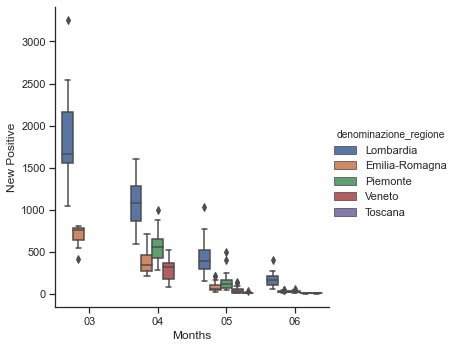

In [220]:
import seaborn as sns
sns.set()

with sns.axes_style(style='ticks'):
    g = sns.catplot("month", "nuovi_positivi", "denominazione_regione", data=regioni[regioni.totale_casi>10000], kind="box")
    g.set_axis_labels("Months", "New Positive")

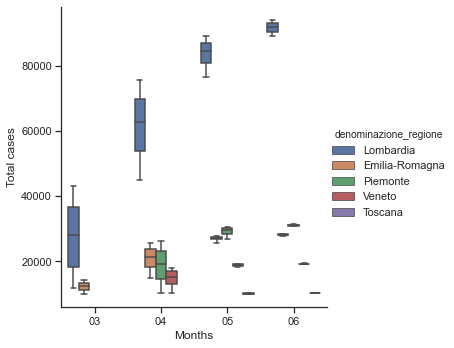

In [221]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("month", "totale_casi", "denominazione_regione", data=regioni[regioni.totale_casi>10000], kind="box")
    g.set_axis_labels("Months", "Total cases")

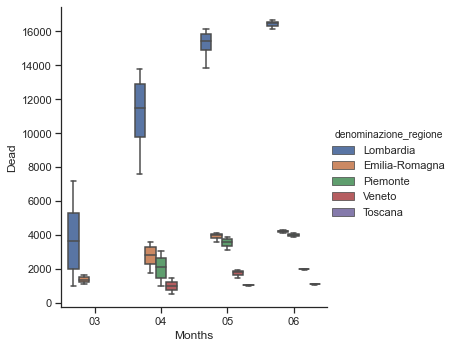

In [229]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("month", "deceduti", "denominazione_regione", data=regioni[regioni.totale_casi>10000], kind="box")
    g.set_axis_labels("Months", "Dead")

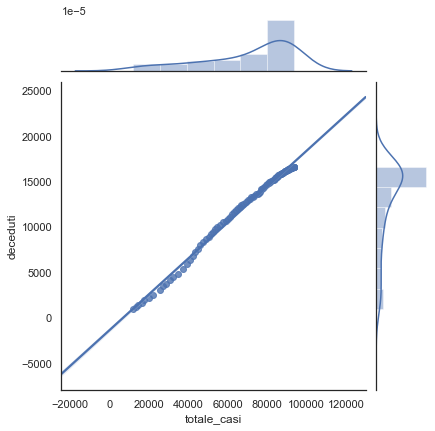

In [237]:
with sns.axes_style('white'):
    sns.jointplot("totale_casi", "deceduti", 
                  data=regioni[(regioni.totale_casi>10000) & (regioni.denominazione_regione == 'Lombardia')], 
                  kind='reg')


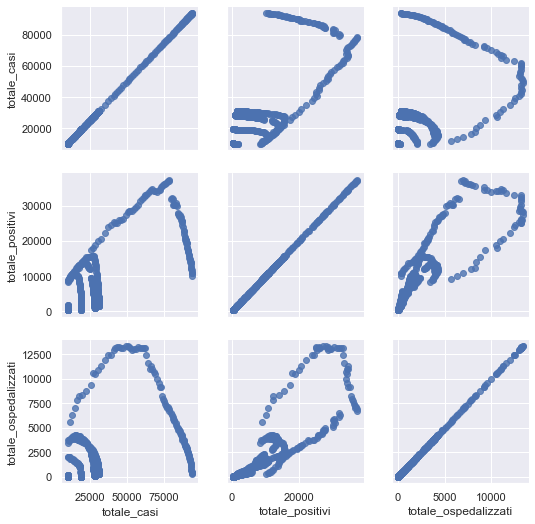

In [244]:
g = sns.PairGrid(regioni[regioni.totale_casi>10000], vars=['totale_casi', 'totale_positivi', 'totale_ospedalizzati'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
#g.add_legend()

In [200]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

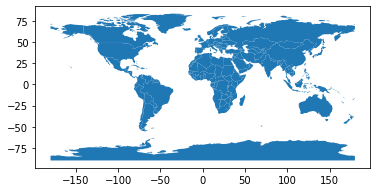

In [201]:
countries.plot()

In [202]:
italy=countries[countries.country=='Italy']
#italy.plot()

In [203]:
italy_map = gpd.read_file("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\Limiti01012018\\Limiti01012018\\ProvCM01012018\\ProvCM01012018_WGS84.shp")
#print(italy_map.head())

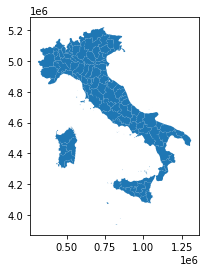

In [204]:
italy_map.plot()

Autori: 
    Ferica Sauro Graziano
    Martina Pacifici

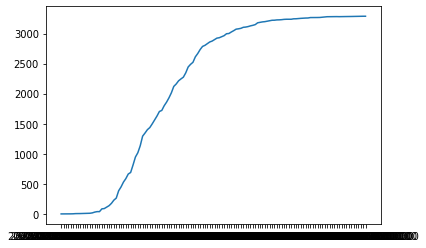

In [205]:
plt.plot(regioni.data[regioni.denominazione_regione=='Abruzzo'], regioni.totale_casi[regioni.denominazione_regione=='Abruzzo']) 

In [206]:
province.rename(columns={'sigla_provincia':'SIGLA'}, inplace = True)

In [207]:
province

,index,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,SIGLA,lat,long,totale_casi,note,new_date,month,week
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-24-08,02,08
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None,2020-02-24-08,02,08
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None,2020-02-24-08,02,08
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None,2020-02-24-08,02,08
4,5,2020-02-24T18:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,0,None,2020-02-24-08,02,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13690,16503,2020-06-30T17:00:00,ITA,5,Veneto,25,Belluno,BL,46.138375,12.217042,1191,None,2020-06-30-26,06,26
13691,16504,2020-06-30T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2673,None,2020-06-30-26,06,26
13692,16505,2020-06-30T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2682,None,2020-06-30-26,06,26
13693,16506,2020-06-30T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,3954,None,2020-06-30-26,06,26


In [208]:
province_2set = italy_map.merge(province, on='SIGLA')

In [209]:
province_2set

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,...,denominazione_regione,codice_provincia,denominazione_provincia,lat,long,totale_casi,note,new_date,month,week
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,Piemonte,2,Vercelli,45.323981,8.423234,0,None,2020-02-24-08,02,08
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,Piemonte,2,Vercelli,45.323981,8.423234,0,None,2020-02-25-08,02,08
2,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,Piemonte,2,Vercelli,45.323981,8.423234,0,None,2020-02-26-08,02,08
3,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,Piemonte,2,Vercelli,45.323981,8.423234,0,None,2020-02-27-08,02,08
4,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,Piemonte,2,Vercelli,45.323981,8.423234,0,None,2020-02-28-08,02,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13690,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,Sardegna,95,Oristano,39.903811,8.591183,61,None,2020-06-26-25,06,25
13691,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,Sardegna,95,Oristano,39.903811,8.591183,61,None,2020-06-27-25,06,25
13692,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,Sardegna,95,Oristano,39.903811,8.591183,61,None,2020-06-28-26,06,26
13693,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,Sardegna,95,Oristano,39.903811,8.591183,61,None,2020-06-29-26,06,26


In [210]:
regioni.shape

(2688, 24)

In [211]:
province.shape

(13695, 15)

In [212]:
italy_map.shape

(107, 13)

In [213]:
province_2set.shape

(13695, 27)